In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
data = pd.read_csv('/content/drive/MyDrive/cars.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [58]:
data.isna().sum().sum()

np.int64(0)

In [59]:
data.duplicated().sum()

np.int64(0)

In [60]:
data.dtypes[data.dtypes == object]

,0
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
enginetype,object
cylindernumber,object
fuelsystem,object


In [61]:
data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [62]:
data['company'] = data.CarName.apply(lambda x: x.split(' ')[0])
data['company'].unique()



array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [63]:
import re

data['company'] = data['company'].apply(lambda x: re.sub('por.{3,4}e', 'porsche', x))
data['company'] = data['company'].apply(lambda x: re.sub('[Nn]issan', 'nissan', x))
data['company'] = data['company'].apply(lambda x: re.sub('ma.da', 'mazda', x))
data['company'] = data['company'].apply(lambda x: re.sub('toy.{1,3}ta', 'toyota', x))
data['company'] = data['company'].apply(lambda x: re.sub('v.{0,4}w.{0,10}', 'volkswagen', x))

data['company'].unique()




array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<Axes: >

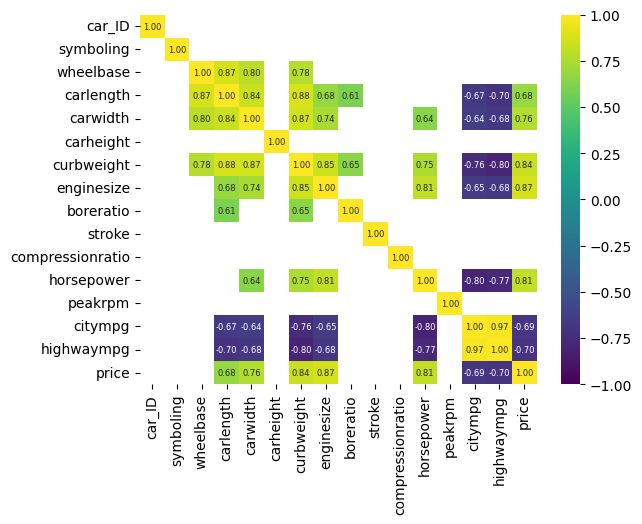

In [64]:
corr_map = data.corr(numeric_only=True)
corr_map = corr_map.where(corr_map.abs() > 0.6, np.nan)
import seaborn as sns
sns.heatmap(corr_map, vmin = -1, vmax = 1, center = 0, cmap = 'viridis', annot = True, fmt = '.2f', annot_kws={'size': 6})


По матрице корреляций можем определить, какие из вещественных признаков нам в принципе не особо интересны с точки зрения целевой переменной (price): **symboling, wheelbase, carheight, boreratio, stroke, compresionratio, peakrpm**

In [65]:
data = data.drop(columns = ['symboling', 'wheelbase', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm'])

Переведем некоторые из категориальных признаков, ошибочно записанных в категориальные как вещественные: cylindernumber и doornumber

In [66]:
diction = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fivteen': 15}
data['cylindernumber'] = data['cylindernumber'].apply(lambda x: diction[x])
data['doornumber'] = data['doornumber'].apply(lambda x: diction[x])


In [67]:
data['CarName'] = data['company']
data = data.drop(columns = 'company')
data = data.rename(columns ={'CarName': 'company'})

In [70]:
cars = pd.get_dummies(data, columns = ['company', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'], dtype='int')

In [71]:
cars

,car_ID,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,168.8,64.1,2548,4,130,111,21,27,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,2,168.8,64.1,2548,4,130,111,21,27,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,3,171.2,65.5,2823,6,152,154,19,26,16500.0,...,1,0,0,0,0,0,0,1,0,0
3,4,176.6,66.2,2337,4,109,102,24,30,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,5,176.6,66.4,2824,5,136,115,18,22,17450.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,188.8,68.9,2952,4,141,114,23,28,16845.0,...,0,0,0,0,0,0,0,1,0,0
201,202,188.8,68.8,3049,4,141,160,19,25,19045.0,...,0,0,0,0,0,0,0,1,0,0
202,203,188.8,68.9,3012,6,173,134,18,23,21485.0,...,1,0,0,0,0,0,0,1,0,0
203,204,188.8,68.9,3217,6,145,106,26,27,22470.0,...,0,0,0,0,0,1,0,0,0,0


In [96]:
from sklearn.model_selection import train_test_split

X_horse = cars[['horsepower']]
y = cars['price']

X_test, X_train, y_test, y_train = train_test_split(X_horse, y, test_size=0.3, random_state=28)

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = lin_reg.score(X_test, y_test)
r2_train = lin_reg.score(X_train, y_train)

charact = pd.DataFrame({'Sample': ['test', 'train'], 'MSE': [mse_test, mse_train], 'R2': [r2_test, r2_train]})
charact['Model'] = 'horse'
charact



,Sample,MSE,R2,Model
0,test,2.270241e+07,0.608645,horse
1,train,2.136618e+07,0.719506,horse


Модель со всеми предикторами

<ipython-input-98-e723d7b2c9ff>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs, x='Коэффициент', y='Признак', palette='coolwarm')


<Axes: xlabel='Коэффициент', ylabel='Признак'>

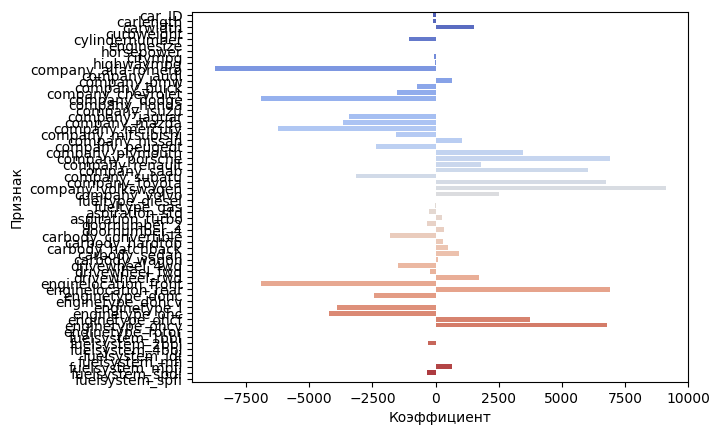

In [98]:
X = cars.drop(columns = 'price')
y = cars.price
X_test_all, X_train_all, y_test_all, y_train_all = train_test_split(X, y, test_size=0.3, random_state=28)

lin_reg.fit(X_train_all, y_train_all)

y_pred_all_train = lin_reg.predict(X_train_all)
y_pred_all_test = lin_reg.predict(X_test_all)

mse_all_train = mean_squared_error(y_train_all, y_pred_all_train)
mse_all_test = mean_squared_error(y_test_all, y_pred_all_test)

r2_test_all = lin_reg.score(X_test_all, y_test_all)
r2_train_all = lin_reg.score(X_train_all, y_train_all)

charact = pd.concat([charact, pd.DataFrame({'Sample': ['test', 'train'], 'MSE': [mse_all_test, mse_all_train], 'R2': [r2_test_all, r2_train_all], 'Model': ['All', 'All']})])
charact

coefs = pd.DataFrame({'Признак': X_train_all.columns, 'Коэффициент':lin_reg.coef_})
coefs
sns.barplot(data=coefs, x='Коэффициент', y='Признак', palette='coolwarm')

Модель без марки машины

In [99]:
cars.columns

Index(['car_ID', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'horsepower', 'citympg', 'highwaympg', 'price',
       'company_alfa-romero', 'company_audi', 'company_bmw', 'company_buick',
       'company_chevrolet', 'company_dodge', 'company_honda', 'company_isuzu',
       'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'company_peugeot',
       'company_plymouth', 'company_porsche', 'company_renault',
       'company_saab', 'company_subaru', 'company_toyota',
       'company_volkswagen', 'company_volvo', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_2',
       'doornumber_4', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'en

In [100]:

cars_without_comp = data.drop(columns = 'company')
cars_without_comp = pd.get_dummies(cars_without_comp, columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'], dtype='int')

X1 = cars_without_comp.drop(columns = 'price')
y1 = cars_without_comp.price

X_test, X_train, y_test, y_train = train_test_split(X1, y1, test_size=0.3, random_state=28)

lin_reg.fit(X_train, y_train)

y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

r2_test = lin_reg.score(X_test, y_test)
r2_train = lin_reg.score(X_train, y_train)

charact = pd.concat([charact, pd.DataFrame({'Sample': ['test', 'train'], 'MSE': [mse_test, mse_train], 'R2': [r2_test, r2_train], 'Model': ['Without company', 'Without company']})])
charact

,Sample,MSE,R2,Model
0,test,2.270241e+07,0.608645,horse
1,train,2.136618e+07,0.719506,horse
0,test,2.651696e+07,0.542888,All
1,train,7.922477e+05,0.989599,All
0,test,1.875529e+07,0.676688,Without company
1,train,2.311187e+06,0.969659,Without company


In [101]:
charact.pivot(index = 'Sample', columns = 'Model', values = 'R2').reset_index()

Model,Sample,All,Without company,horse
0,test,0.542888,0.676688,0.608645
1,train,0.989599,0.969659,0.719506


<ipython-input-102-2a110d4d8a62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs, x='Коэффициент', y='Признак', palette='coolwarm')


<Axes: xlabel='Коэффициент', ylabel='Признак'>

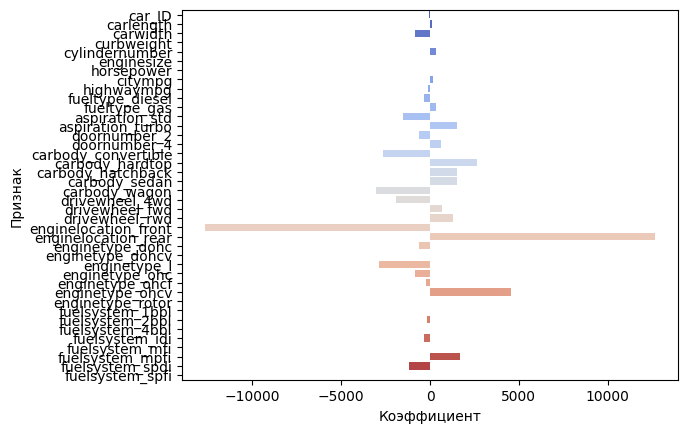

In [102]:
coefs = pd.DataFrame({'Признак': X_train.columns, 'Коэффициент':lin_reg.coef_})
coefs
sns.barplot(data=coefs, x='Коэффициент', y='Признак', palette='coolwarm')